In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('secom.data', sep = ' ', names = range(590))
dft = pd.read_csv('testSet.txt', sep = '\t', names = ['x0', 'x1'])

In [3]:
dataMat = np.mat(dft.values)
dataMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [9]:
"""
input : 
    dataMat : 数据集矩阵
    d ： 低维空间维数
output ：
    W : 投影矩阵
    u : 样本均值向量
"""
def PCA(dataMat, d):
    r, c = dataMat.shape
    u = np.sum(dataMat, 0) / r
    X = dataMat - u   # 去中心化
    covMat = X.T * X
    lamb, A = np.linalg.eig(covMat)
    eigInd = np.argsort(lamb)
#     print(eigInd)
    eigInd = eigInd[:-(d+1):-1]
#     print(eigInd)
    W = A[:,eigInd]
    return W, u

In [16]:
W, u = PCA(dataMat, 1)

In [17]:
"""
dataNew:
    求得降维后的dataMat'
reconMat:
    求得重构的xi一尖
"""
dataNew = (dataMat - u) * W
reconMat = dataNew * W.T + u

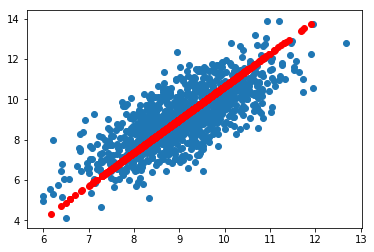

In [18]:
x = dataMat.T.getA()[0];y = dataMat.T.getA()[1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)
x0 = reconMat[:,0].flatten().A[0];y0 = reconMat[:,1].flatten().A[0]
ax.scatter(x0, y0, marker = 'o', c = 'r' )